In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Dataset of RNN

In [2]:
dataset_train = pd.read_csv('/content/drive/MyDrive/RNN/Part 3 - Recurrent Neural Networks/Google_Stock_Price_Train.csv')
training_data = dataset_train.iloc[:,1:2].values
print(training_data)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


## Feature Scaling - Normalization

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0 , 1)) ## To reduce the dataset in the 0 and 1 using normalization
training_scaled_data = sc.fit_transform(training_data)
print(training_scaled_data)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


In [4]:
## Adding the New Data_Structure

X_train = []
y_train = []
for i in range(60,1258):
  X_train.append(training_scaled_data[i-60:i , 0])
  y_train.append(training_scaled_data[i , 0])
X_train , y_train = np.array(X_train) , np.array(y_train)

In [5]:
print(X_train) , print(y_train)

[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]
[0.08627874 0.08471612 0.07454052 ... 0.95725128 0.93796041 0.93688146]


(None, None)

## REshaping the X_train

In [6]:
X_train = np.reshape(X_train , (X_train.shape[0],X_train.shape[1],1))
print(X_train)

[[[0.08581368]
  [0.09701243]
  [0.09433366]
  ...
  [0.07846566]
  [0.08034452]
  [0.08497656]]

 [[0.09701243]
  [0.09433366]
  [0.09156187]
  ...
  [0.08034452]
  [0.08497656]
  [0.08627874]]

 [[0.09433366]
  [0.09156187]
  [0.07984225]
  ...
  [0.08497656]
  [0.08627874]
  [0.08471612]]

 ...

 [[0.92106928]
  [0.92438053]
  [0.93048218]
  ...
  [0.95475854]
  [0.95204256]
  [0.95163331]]

 [[0.92438053]
  [0.93048218]
  [0.9299055 ]
  ...
  [0.95204256]
  [0.95163331]
  [0.95725128]]

 [[0.93048218]
  [0.9299055 ]
  [0.93113327]
  ...
  [0.95163331]
  [0.95725128]
  [0.93796041]]]


In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


## Initializing the RNN object

In [8]:
regressor = Sequential()

# Adding the first layer of LSTM and Dropout for regularization

In [9]:
regressor.add(LSTM(units = 50 , return_sequences= True , input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [11]:
# Adding the Next LSTM layer along with some dropout regularization
regressor.add(LSTM(units= 50 , return_sequences= True))
regressor.add(Dropout(0.2))

In [12]:
regressor.add(LSTM(units= 50 , return_sequences= True))
regressor.add(Dropout(0.2))

In [13]:
regressor.add(LSTM(units= 50 ))
regressor.add(Dropout(0.2))

## Output Layer

In [14]:
regressor.add(Dense(units = 1))

## Compiling the RNN
* Optimizer can be MaxProp or Adam

In [16]:
regressor.compile(optimizer = 'adam' , loss = 'mean_squared_error') # loss = for regression is mean squared error

# Fitting the RNN

In [17]:
regressor.fit(X_train , y_train, epochs = 100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 13s 106ms/step - loss: 0.0403
Epoch 2/100
38/38 [==============================] - 6s 147ms/step - loss: 0.0065
Epoch 3/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0056
Epoch 4/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0055
Epoch 5/100
38/38 [==============================] - 5s 132ms/step - loss: 0.0050
Epoch 6/100
38/38 [==============================] - 5s 124ms/step - loss: 0.0060
Epoch 7/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0051
Epoch 8/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0046
Epoch 9/100
38/38 [==============================] - 5s 141ms/step - loss: 0.0042
Epoch 10/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0044
Epoch 11/100
38/38 [==============================] - 4s 103ms/step - loss: 0.0043
Epoch 12/100
38/38 [==============================] - 6s 153ms/step - loss: 0.0039
Epoch 13/100

## GEtting the test dataset

In [18]:
dataset_test = pd.read_csv('/content/drive/MyDrive/RNN/Part 3 - Recurrent Neural Networks/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:,1:2].values
print(real_stock_price)


[[778.81]
 [788.36]
 [786.08]
 [795.26]
 [806.4 ]
 [807.86]
 [805.  ]
 [807.14]
 [807.48]
 [807.08]
 [805.81]
 [805.12]
 [806.91]
 [807.25]
 [822.3 ]
 [829.62]
 [837.81]
 [834.71]
 [814.66]
 [796.86]]


# Getting the predicted stock price

In [19]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis = 0)
 # Horizontal concatentaion axis = 1 for vertical axsis = 0
inputs = dataset_total[len(dataset_total) - len(dataset_test)- 60 :].values
inputs  = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60,80):
  X_test.append(inputs[i-60:i , 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test , (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


In [20]:
print(predicted_stock_price)

[[779.23627]
 [776.7224 ]
 [776.53815]
 [777.5994 ]
 [780.5443 ]
 [785.9239 ]
 [791.3294 ]
 [794.2029 ]
 [795.1227 ]
 [795.07745]
 [794.716  ]
 [794.2217 ]
 [793.78357]
 [793.9839 ]
 [794.6905 ]
 [798.54193]
 [804.79114]
 [811.94   ]
 [816.52234]
 [814.0102 ]]


In [21]:
print(real_stock_price)

[[778.81]
 [788.36]
 [786.08]
 [795.26]
 [806.4 ]
 [807.86]
 [805.  ]
 [807.14]
 [807.48]
 [807.08]
 [805.81]
 [805.12]
 [806.91]
 [807.25]
 [822.3 ]
 [829.62]
 [837.81]
 [834.71]
 [814.66]
 [796.86]]


## Visualizing the results

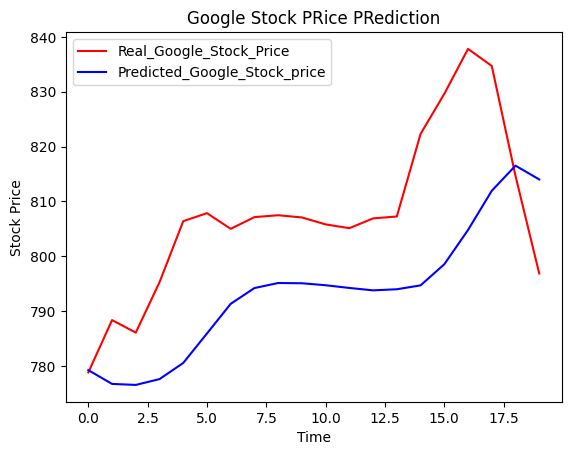

In [23]:
plt.plot(real_stock_price , color = 'red' , label = 'Real_Google_Stock_Price')
plt.plot(predicted_stock_price , color = 'blue' , label = 'Predicted_Google_Stock_price')
plt.title('Google Stock PRice PRediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()